# Multivariant Linear Regression

In this notebook we discuss some basic aspects of the multivariant linear regression and illustrate our `LinearRegressior` module.

## 1 - Set up

In [1]:
import numpy as np #to generate fake data
import matplotlib.pyplot as plt #visualisation tools

from linear_regression import LinearRegressor #our linear regression module

## 2 - Basics of linear regression

### 2.1 - The model
We consider a random variable $\Upsilon$ and a set of independent events $\omega = \{Y_1, \dots, Y_n\}$. We *assume* that each event can be expressed as
$$
Y_i = b_0 + b_1 x_{i,\ 1} + \dots + b_p x_{i,\ p} + \epsilon_i
$$
for $i = 1, \dots, n$, where $b_0, \dots, b_p$ are constant coefficients, $x_{i,\ 1}, \dots, x_{i,\ p}$ are the values assumed by the deterministic predictors $x_1, \dots, x_p$ for the $i$-th event and $\epsilon$ is the random error. It is enough to assume for the error that its expectation value and variance satisfy
$$
\textrm{E}(\epsilon_i) = 0,  \;\;\;\;\; \textrm{E}(\epsilon_i\epsilon_j) = 0\;\; \textrm{if}\;\; i\neq j, \;\;\;\;\; \textrm{and} \;\;\;\;\; \textrm{Var}(\epsilon_i) = \sigma^2,
$$
respectively, where $\sigma$ is a constant. From the properties assumed for the error, we have that for $Y_i$
$$
\textrm{E}(Y_i) = b_0 + b_1 x_{i,\ 1} + \dots + b_p x_{i,\ p} \;\;\;\;\; \textrm{and} \;\;\;\;\; \textrm{Var}(Y_i) = \sigma^2.
$$

Next, we consider the set of observations $O = \{y_1, \dots, y_n\}$ of the events in $\omega$. We want to use the observations $O$ to estimate the coefficients $b_0, \dots, b_p$ by $\hat{b}_0, \dots, \hat{b}_p$ in such a way that the events expectation value $\textrm{E}(Y_i)$ is as close as possible to the corresponding observed value $y_i$. For that we use the **method of least squares**, where we minimise the residual sum of squares
$$
S = \sum_{i = 1}^n(Y_i - b_0 - b_1 x_{i,\ 1} - \dots - b_p x_{i,\ p})^2
$$
in terms of the coefficients.

It is convenient to define the following matrix notation for the observations of the $\Upsilon$ variable, the predictors $x_1, \dots, x_p$ and coefficients:
$$
Y = 
\begin{bmatrix}
Y_1\\
\vdots\\
Y_n
\end{bmatrix}, \;\;\;\;\;
b = 
\begin{bmatrix}
b_0\\
\vdots\\
b_p
\end{bmatrix} \;\;\;\;\; \textrm{and} \;\;\;\;\;
X =
\begin{bmatrix}
1 & x_{1,\ 1} & \dots & x_{1,\ p}\\
\vdots & \vdots & \ddots & \vdots\\
1 & x_{N,\ 1} & \dots & x_{n,\ p}
\end{bmatrix}.
$$
Then, in this more compact notation the linearity assumption of $Y$ reads 
$$
Y = X b + \epsilon,
$$
where $\epsilon$ is the column vector of the errors, and the residual sum of squares can be written as
$$
S(b) = (Y - Xb)^\textrm{T}(Y - Xb).
$$

The estimate $\hat{b}$ for the coefficients matrix $b$ is then defined as the one that minimises $S$. Thus, taking the gradient with respect to $b$, we conclude that the estimate is obtained from solving the linear system
$$
X^\textrm{T} X \hat{b} - X^\textrm{T}Y = 0,
$$

**Some properties of the estimators for the coefficients.** From the linear system above, we can deduce the properties of the estimator $\hat{b}$. Note that $\hat{b}$ is also a random variable, since its a linear combination of the events in $\omega$. In particular, we are interested in its expectation value and variance, which are given by
$$
\textrm{E}(\hat{b}) = b \;\;\;\;\; \textrm{and} \;\;\;\;\; \textrm{Var}(\hat{b}) = \sigma^2 (X^\textrm{T} X)^{-1}.
$$

### 2.2 - Solving the linear system

In solving the linear system above we essentially have to compute the inverse of the $(p + 1)\times (p + 1)$-matrix $X^\textrm{T}X$. In computing this inverse, two types of problems can arise:

1. **The inverse does not exists.** The inverse is not defined if, and only if, the columns of $X$ are not linearly independent of each other. This is the multicollinearity problem. This happens when there is an actual linear relation amongst some of the predictors or when the system is underdetermined, i.e. when $p > N$. In essence, the problem is that our samples probe a space that has lower dimension than that of where our linear model is set up.
2. **The inverse exists, but its computation is numerically unstable.** The numerical computation of the inverse becomes unstable when there is are high linear correlations amongst some of the predictions. This leads to eigenvalues that are too small, making small changes in $X$ to create large changes in $(X^\textrm{T} X)^{-1}$.

In both cases we can employ the singular value decomposition (SVD) to compute the pseudoinverse (a.k.a. Moore-Penrose inverse) $X^+$ for the matrix $X$ and then use it to obtain the estimate for the linear regression coefficients according to
$$
\hat{b} = X^+ Y
$$
and re-express the variance of $\hat{b}$ as
$$
\textrm{Var}(\hat{b}) = \sigma^2(X^{+}X^{+\textrm{T}})
$$

Combined with the SVD method of `Numpy`, this is the way our module computes the estimators.

## 3 - Statistical analysis of the coefficients

### 3.1 - Estimation interval

We would like to determine how accurate are our coefficient estimate $\hat{b}_i$ as an approximation for the true value $b_i$. We first notice that $\hat{b}_i$ is a random variable obtained as a linear combination of the events $\omega$ of the random variable $\Upsilon$. Hence, for a high enough number of observations $n$,  $\hat{b}_i$ follows in good approximation a normal distribution $N$ centred in $b_i$ with variance $\sigma^2 (X^+ X^{+\textrm{T}})_{ii}$. Thus it is convenient to normalise $\hat{b}_i$ as
$$
\frac{\hat{b}_i - b_i}{\sqrt{\sigma^2(X^+ X^{+T})_{ii}}}.
$$
If $\sigma$, the variance of the random error $\epsilon$, is know, we can use the normal distribution to find the confidence interval for $b_i$ within a certain confidence level. This is however usually not the case and we have to find a estimator $\hat{\sigma}$ that is centred in $\sigma$.

Using the residual sum of squares evaluated at the estimators, $S(\hat{b})$, we can show that $\textrm{E}[S(\hat{b})] = (n - p - 1)\sigma^2$ and, thus, define the estimator
$$
\hat{\sigma}^2 = \frac{S(\hat{b})}{n - p - 1}.
$$
With this estimator for the variance of the error, we define the *pivotal quantity*
$$
\Omega_i = \frac{\hat{b}_i - b_i}{\sqrt{\hat{\sigma}^2(X^+ X^{+T})_{ii}}},
$$
which in good approximation follows a $t$-distribution with $n - p - 1$ degrees of freedom. From that distribution we can compute the confidence interval for the coefficient $b_i$ as
$$
\gamma = P\left(a_\gamma < \frac{\hat{b}_i - b_i}{\sqrt{\hat{\sigma}^2(X^+ X^{+T})_{ii}}} < b_\gamma\right) 
= P\left(\hat{b}_i + a_\gamma \sqrt{\hat{\sigma}^2(X^+ X^{+T})_{ii}} < b_i < \hat{b}_i + b_\gamma \sqrt{\hat{\sigma}^2(X^+ X^{+T})_{ii}}\right)
$$
at $100\gamma\%$ confidence level. It means that if we repeat the sampling of the random variable $\Upsilon$ (for the predictors $x_1, \dots, x_p$ fixed), $100\gamma\%$ of the confidence interval constructed this way will contain the true value of the coefficient $b_i$.

### 3.2 - Hypothesis testing

We would like to test the hypothesis of whether $b_i$ are null or not for each individual coefficient up to a certain significance level. Hence the null and alternative hypothesis are
\begin{split}
&\textrm{H}_0\ \textrm{:}\; b_i = 0,\\
&\textrm{H}_\textrm{a}\ \textrm{:}\; b_i \neq 0.
\end{split}
The relevant statistics for this test is
$$
W_i = \frac{\hat{b}_i}{\sqrt{\hat{\sigma}^2(X^+ X^{+T})_{ii}}},
$$
which again follows in good approximation a $t$-distribution $t_{(n-p-1)}$ with $n - p - 1$ degrees of freedom. The probability of rejecting $\textrm{H}_0$ when $\textrm{H}_0$ true is given by
$$
\alpha = 2F_{t_{(n - p - 1)}}(-|w_{\alpha}|),
$$
where $F_{t_{(n-p-1)}}$ is the cumulative probability distribution of $t_{(n-p-1)}$ and the factor $2$ comes from the fact that the probability distribution used in the test is symmetric. 

For fixed $\alpha$, this last expression defines a critical region $\textrm{CR}_\alpha$ where $\textrm{H}_0$ is rejected. Since $|w_\alpha| = F_{t_{(n - p - 1)}}^{-1}(1 - \alpha/2)$, we have that $$
\textrm{CR}_\alpha = (-\infty,\ -|w_\alpha|)\cup (|w_\alpha|,\ \infty).
$$
Then, given a realisation $w_i$ of the statistic $W_i$, if $w_i \in \textrm{CR}_\alpha$ we have evidence to reject $\textrm{H}_0$ at $100\alpha\%$ significance level. Typically, we choose significance levels of $1\%$, $5\%$ or $10\%$.

An alternative way to perform this check is to compute the so-called $p$-value of the test. The $p$-value is the probability of obtaining an estimation on the statistic $W_i$ more or as much as in disfavour of the null hypothesis than the realisation $w_i$, assuming that $\textrm{H}_0$ is true. In other words, the $p$-value in our case is given by
$$
p = 2F_{t_{(n - p - 1)}}(-|w_i|),
$$
where again the factor $2$ is due to the symmetry of the $t$-distribution. Then, is the $p$-value is small enough according to some criteria (defined by the test user), we can say we have enough evidence to reject $\textrm{H}_0$. 

### 3.3 - F-statistic

## 4 - The `LinearRegressor` module 

In [10]:
n_samples = 100
n_predictors = 3
X = np.random.rand(n_samples, n_predictors)
error = np.random.normal(0., 1., n_samples)
y = 2.1 + 3.84*X[:,0] + 7.56*X[:,1] + 1.29*X[:,2] + error

In [11]:
reg = LinearRegressor()

In [12]:
reg.fit(X, y)

In [13]:
y_hat = reg.predict(X)

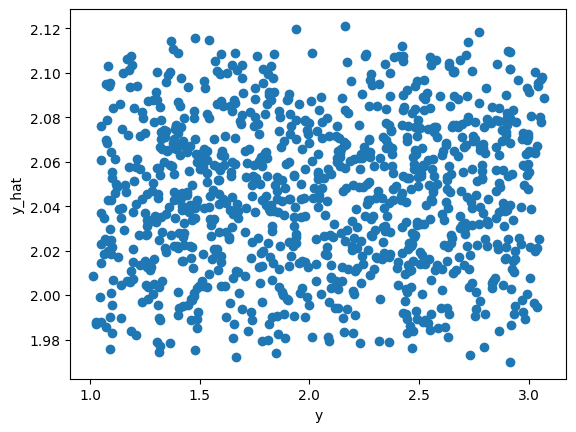

In [14]:
plt.scatter(y, y_hat)
plt.xlabel("y")
plt.ylabel("y_hat")
plt.show()

In [15]:
reg.score(X, y)

+-------------------------+--------+
|         quantity        | value  |
+-------------------------+--------+
| residual standard error | 0.5765 |
|           R^2           | 0.0035 |
|       F-statistic       | 1.1646 |
+-------------------------+--------+


In [16]:
reg.get_params()

{'intercept': 1.9689330039624038, 'coef_1': -0.004059041489250334, 'coef_2': 0.049994584607507137, 'coef_3': 0.10632699232411749}


In [17]:
reg.regression_report(X, y)

+-----------+-------------+-----------------------------+------------+---------+
|   *****   | coefficient | confidence interval @ 95.0% | std. error | p-value |
+-----------+-------------+-----------------------------+------------+---------+
| intercept |    1.9689   |       [1.8580, 2.0799]      |   0.0565   |  0.0000 |
|   coef_1  |   -0.0041   |      [-0.1278, 0.1197]      |   0.0631   |  0.9487 |
|   coef_2  |    0.0500   |      [-0.0714, 0.1714]      |   0.0619   |  0.4192 |
|   coef_3  |    0.1063   |      [-0.0200, 0.2327]      |   0.0644   |  0.0990 |
+-----------+-------------+-----------------------------+------------+---------+
